Group 5

Vaishnavi Gaikwad (002826199)

Surya Vinay Kumar (002244969)

Deepali Krishna Kashyap (002699564)

Divya Shukla (002613140)

Amit Arunkumar Kanojia (002208440)


Dataset:**WestRoxbury.csv**.<br>
The dataset contains information about different value of the properties in West Roxbury.<br>
The value of the properties is available under the variable TOTAL_VALUE, which is the target variable, and all the other variables are the feature variables.<br>

**Data Dictionary:**<br>

* LOT_SQFT: Total lot size of parcel in square feet<br>

* YR_BUILT: Year property was built<br>

* GROSS_AREA: Gross floor area<br>

* LIVING_AREA: Total living area for residential properties (ft2)<br>

* FLOORS: Number of floors<br>

* ROOMS: Total number of rooms<br>

* BEDROOMS: Total number of bedrooms<br>

* FULL_BATH: Total number of full baths<br>

* HALF_BATH: Total number of half baths<br>

* KITCHEN: Total number of kitchens<br>

* FIREPLACE: Total number of fireplaces<br>

* REMODEL_None: House was not remodeled (Yes = 1, No=0)<br>

* REMODEL_Recent: House was recently remodeled (Yes = 1, No=0)<br>

* TOTAL_VALUE: Total assessed value for property, in thousands of USD<br>

GROUP - 5
Team Members -
1. Vaishnavi Gaikwad - 002826199
2. Surya Vinay Kumar - 002244969
3. Deepali Krishna Kashyap - 002699564
4. Divya Shukla 002613140
5. Amit Kanojia - 002208440

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

In [ ]:
# Import dataset with variables
westroxbury_df = pd.read_csv('WestRoxbury.csv')

##1.) Exploratory Data Analysis

In [ ]:
# View few rows of the dataframe
westroxbury_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [ ]:
print(westroxbury_df.columns)

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')


In [ ]:
# Creating a dictionary to map old names to corrected names
name_corrections = {
    'TOTAL VALUE ': 'TOTAL_VALUE',
    'LOT SQFT ': 'LOT_SQFT',
    'GROSS AREA ': 'GROSS_AREA',
    'LIVING AREA': 'LIVING_AREA',
    'FLOORS ': 'FLOORS',
    'BEDROOMS ': 'BEDROOMS',
    'FULL BATH': 'FULL_BATH',
    'HALF BATH': 'HALF_BATH',
    'YR BUILT': 'YR_BUILT',

}

# Apply the corrections
westroxbury_df = westroxbury_df.rename(columns=name_corrections)

# Verify the changes
print(westroxbury_df.columns)

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')


In [ ]:
# View shape of dataset
print(westroxbury_df.shape)

(5802, 14)


#### There are 5802 records and 14 variables in the dataframe

### Data Preparation

In [ ]:
## Converting the 'REMODEL' column into two different columns 'REMODEL_None' and 'REMODEL_Recent'
## Creating the new columns
westroxbury_df['REMODEL_None'] = westroxbury_df['REMODEL'].isna().astype(int)
westroxbury_df['REMODEL_Recent'] = (westroxbury_df['REMODEL'] == 'Recent').astype(int)

In [ ]:
## Convert integer variables to relevant categorical variables
westroxbury_df['FLOORS'] = westroxbury_df['FLOORS'].astype('category')
westroxbury_df['ROOMS'] = westroxbury_df['ROOMS'].astype('category')
westroxbury_df['BEDROOMS'] = westroxbury_df['BEDROOMS'].astype('category')
westroxbury_df['FULL_BATH'] = westroxbury_df['FULL_BATH'].astype('category')
westroxbury_df['HALF_BATH'] = westroxbury_df['HALF_BATH'].astype('category')
westroxbury_df['KITCHEN'] = westroxbury_df['KITCHEN'].astype('category')
westroxbury_df['FIREPLACE'] = westroxbury_df['FIREPLACE'].astype('category')
westroxbury_df['REMODEL_None'] = westroxbury_df['REMODEL_None'].astype('category')
westroxbury_df['REMODEL_Recent'] = westroxbury_df['REMODEL_Recent'].astype('category')

In [ ]:
westroxbury_df.head()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,REMODEL_None,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN,1,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent,0,1
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN,1,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN,1,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN,1,0


In [ ]:
# Dropping the 'REMODEL' column
westroxbury_df = westroxbury_df.drop(columns=['REMODEL'])

# Verify the changes
print(westroxbury_df.columns)

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_None', 'REMODEL_Recent'],
      dtype='object')


In [ ]:
# Creating a derived variable ‘building_age’ based on ‘YR_BUILT’
westroxbury_df['building_age'] = 2024 - westroxbury_df['YR_BUILT']
westroxbury_df['building_age'].describe()

,building_age
count,5802.000000
mean,87.255084
std,35.989910
min,13.000000
25%,69.000000
50%,89.000000
75%,104.000000
max,2024.000000


In [ ]:
# Deleting the ‘YR_BUILT’ variable
westroxbury_df.drop(['YR_BUILT'], axis=1, inplace=True)

## Univariate Analysis

In [ ]:
# Summary of LOT_SQFT variable
westroxbury_df['LOT_SQFT'].describe()

,LOT_SQFT
count,5802.000000
mean,6278.083764
std,2669.707974
min,997.000000
25%,4772.000000
50%,5683.000000
75%,7022.250000
max,46411.000000


In [ ]:
# Summary of GROSS_AREA variable
westroxbury_df['GROSS_AREA'].describe()

,GROSS_AREA
count,5802.000000
mean,2924.842123
std,883.984726
min,821.000000
25%,2347.000000
50%,2700.000000
75%,3239.000000
max,8154.000000


In [ ]:
# Summary of building_age variable
westroxbury_df['building_age'].describe()

,building_age
count,5802.000000
mean,87.255084
std,35.989910
min,13.000000
25%,69.000000
50%,89.000000
75%,104.000000
max,2024.000000


In [ ]:
# Summary of LIVING_AREA variable
westroxbury_df['LIVING_AREA'].describe()

,LIVING_AREA
count,5802.000000
mean,1657.065322
std,540.456726
min,504.000000
25%,1308.000000
50%,1548.500000
75%,1873.750000
max,5289.000000


In [ ]:
# Summary of TAX variable
westroxbury_df['TAX'].describe()

,TAX
count,5802.000000
mean,4939.485867
std,1247.649118
min,1320.000000
25%,4089.500000
50%,4728.000000
75%,5519.500000
max,15319.000000


In [ ]:
# Summary of TOTAL_VALUE variable
westroxbury_df['TOTAL_VALUE'].describe()

,TOTAL_VALUE
count,5802.000000
mean,392.685715
std,99.177414
min,105.000000
25%,325.125000
50%,375.900000
75%,438.775000
max,1217.800000


##2.) Distribution Analysis

<Axes: xlabel='LOT_SQFT'>

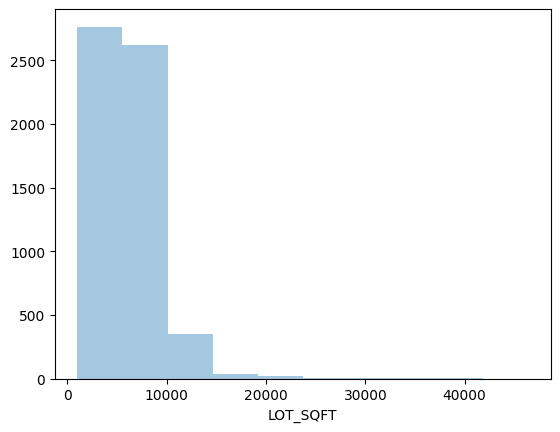

In [ ]:
# Histogram for LOT_SQFT
sns.distplot(westroxbury_df['LOT_SQFT'],bins=10,kde=False)

#### Total lot size of parcel in square feet(LOT_SQFT) is mostly between 100 to 10,000

<Axes: xlabel='building_age'>

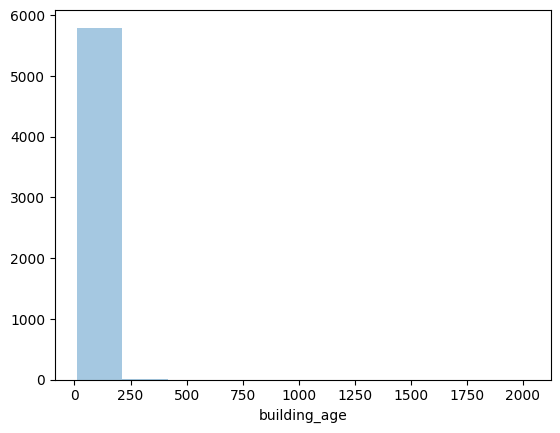

In [ ]:
# Histogram for Building age
sns.distplot(westroxbury_df['building_age'],bins=10,kde=False)

#### Most buildings are between 50 and 120 years old

<Axes: xlabel='GROSS_AREA'>

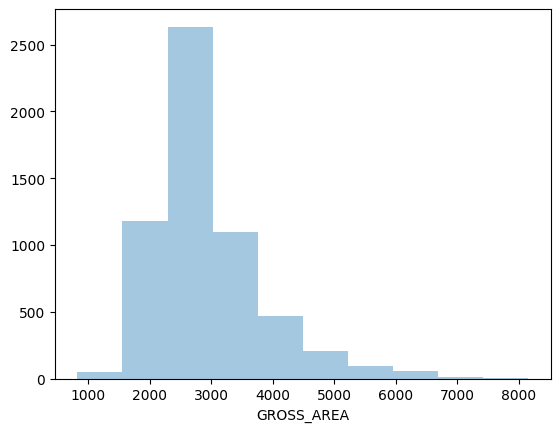

In [ ]:
# Histogram for GROSS_AREA
sns.distplot(westroxbury_df['GROSS_AREA'],bins=10,kde=False)

#### Gross floor area(GROSS_AREA) is mosty between the range of 1500 to 3700

<Axes: xlabel='LIVING_AREA'>

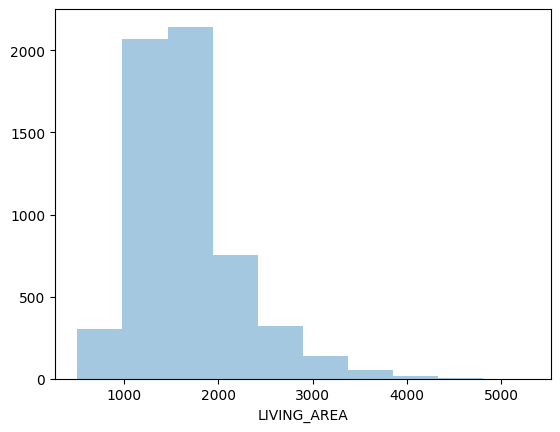

In [ ]:
# Histogram for LIVING_AREA
sns.distplot(westroxbury_df['LIVING_AREA'],bins=10,kde=False)

#### Total living area for residential properties (ft2)(LIVING_AREA) is mostly between 1000ft2 to 2400ft2

<Axes: xlabel='TAX'>

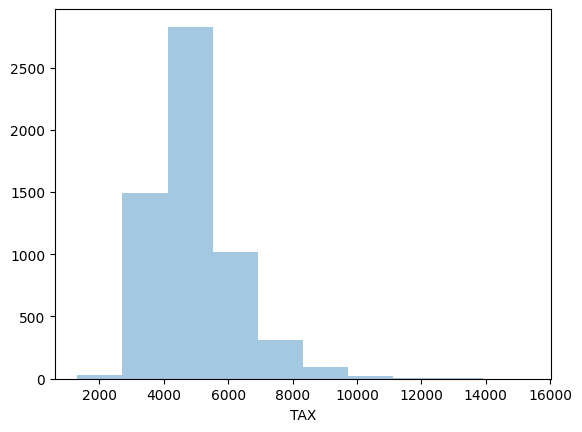

In [ ]:
# Histogram for TAX
sns.distplot(westroxbury_df['TAX'],bins=10,kde=False)

<Axes: xlabel='TOTAL_VALUE'>

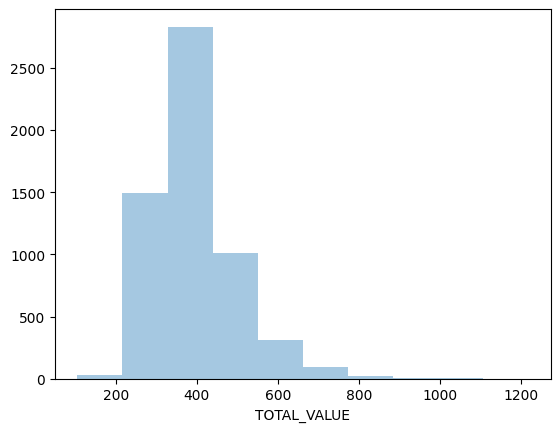

In [ ]:
# Histogram for TOTAL_VALUE
sns.distplot(westroxbury_df['TOTAL_VALUE'],bins=10,kde=False)

#### The Total assessed value for property, in thousands of USD(TOTAL_VALUE) is mostly between 210 to 550

<Axes: ylabel='LOT_SQFT'>

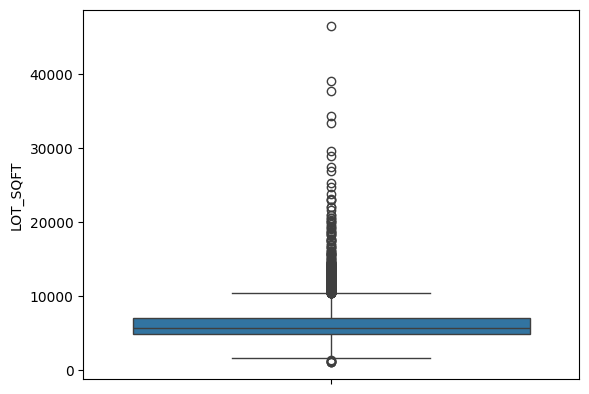

In [ ]:
# Boxplot for LOT_SQFT
sns.boxplot(y = westroxbury_df['LOT_SQFT'])

#### The median of Total lot size of parcel in square feet(LOT_SQFT) is 6000

<Axes: ylabel='building_age'>

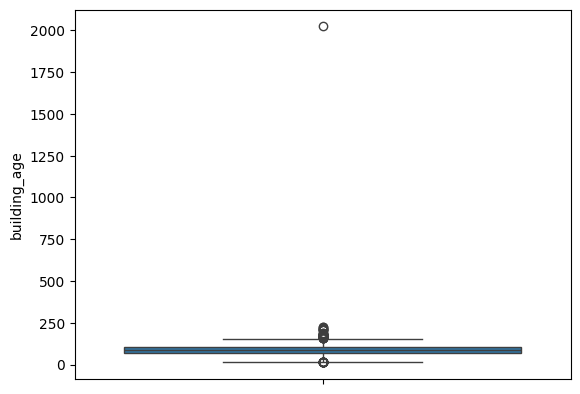

In [ ]:
# Boxplot for Building Age
sns.boxplot(y = westroxbury_df['building_age'])

#### The median building age is around 85 years

<Axes: ylabel='GROSS_AREA'>

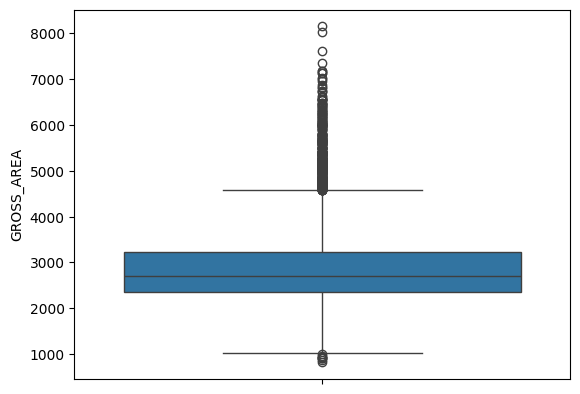

In [ ]:
# Boxplot for GROSS_AREA
sns.boxplot(y = westroxbury_df['GROSS_AREA'])

#### The median of Gross floor area(GROSS_AREA) is 2700

<Axes: ylabel='LIVING_AREA'>

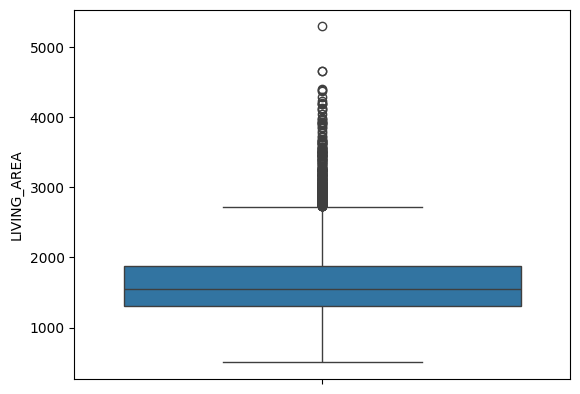

In [ ]:
# Boxplot for LIVING_AREA
sns.boxplot(y = westroxbury_df['LIVING_AREA'])

#### The median of Total living area for residential properties (ft2)(LIVING_AREA) is 1500ft2

<Axes: ylabel='TAX'>

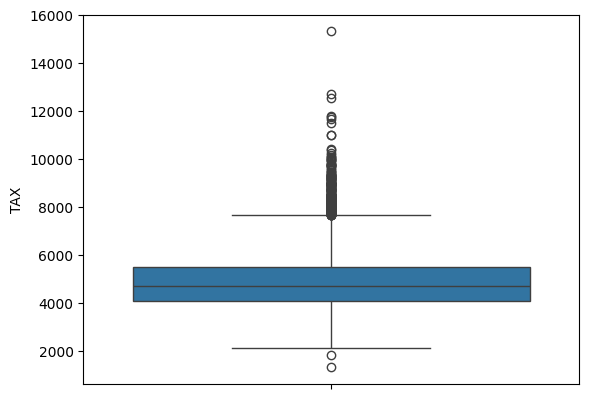

In [ ]:
# Boxplot for TAX
sns.boxplot(y = westroxbury_df['TAX'])

<Axes: ylabel='TOTAL_VALUE'>

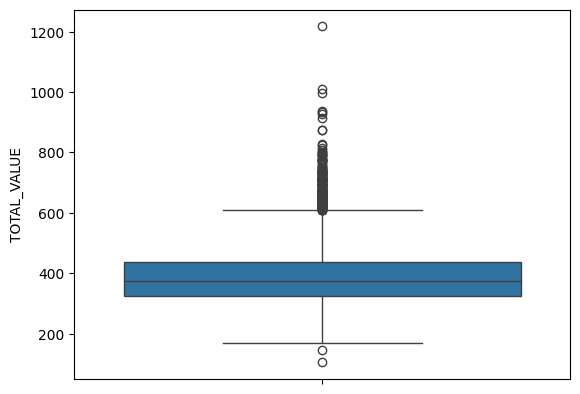

In [ ]:
# Boxplot for TOTAL_VALUE
sns.boxplot(y = westroxbury_df['TOTAL_VALUE'])

#### The median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) is 380

In [ ]:
# Count the values in REMODEL_None categorical variable
westroxbury_df['REMODEL_None'].value_counts()

,count
REMODEL_None,
1,4346
0,1456


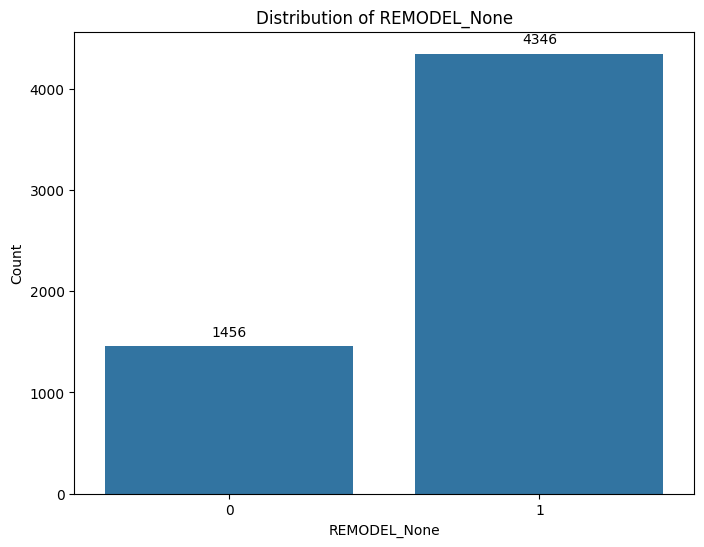

In [ ]:
# Countplot for REMODEL_None variable
#sns.countplot(westroxbury_df['REMODEL_None'])
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='REMODEL_None', data=westroxbury_df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Distribution of REMODEL_None')
plt.xlabel('REMODEL_None')
plt.ylabel('Count')

# Ensure x-axis shows both 0 and 1
plt.xticks([0, 1])

# Show the plot
plt.show()

#### The number of house was not remodeled(REMODEL_None) is higher than number of houses remodeled

In [ ]:
# Count the values in REMODEL_Recent categorical variable
westroxbury_df['REMODEL_Recent'].value_counts()

,count
REMODEL_Recent,
0,4927
1,875


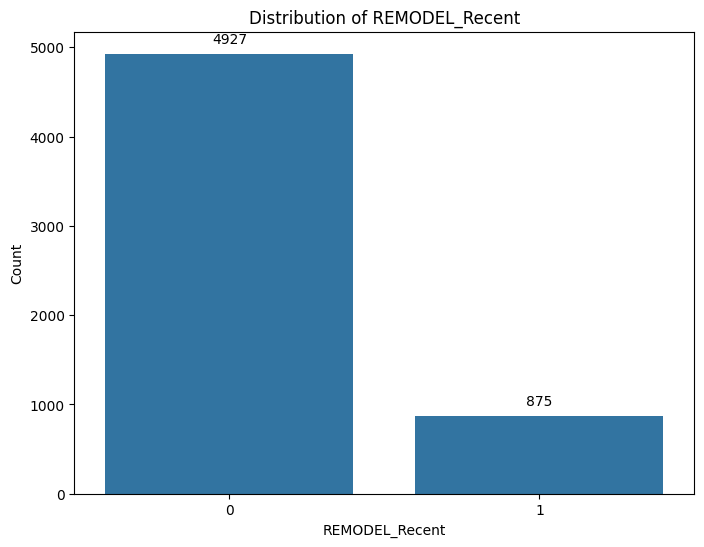

In [ ]:
# Countplot for REMODEL_Recent variable
# sns.countplot(westroxbury_df['REMODEL_Recent'])

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='REMODEL_Recent', data=westroxbury_df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Distribution of REMODEL_Recent')
plt.xlabel('REMODEL_Recent')
plt.ylabel('Count')

# Ensure x-axis shows both 0 and 1
plt.xticks([0, 1])

# Show the plot
plt.show()

#### The number of house was recently remodeled(REMODEL_Recent) is lesser than number of houses that were not recently remodeled.

In [ ]:
# Count the values in KITCHEN categorical variable
westroxbury_df['KITCHEN'].value_counts()

,count
KITCHEN,
1,5713
2,89


##3.) Feature Selection and Engineering

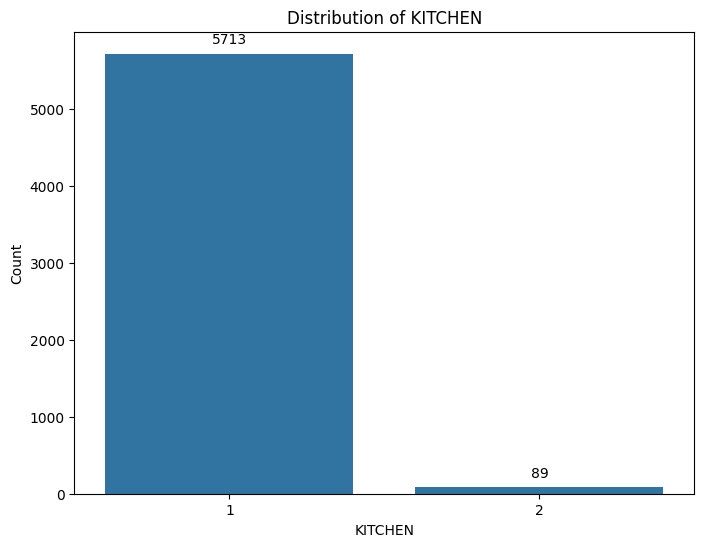

In [ ]:
# Countplot for KITCHEN variable
# sns.countplot(westroxbury_df['KITCHEN']);

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='KITCHEN', data=westroxbury_df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Distribution of KITCHEN')
plt.xlabel('KITCHEN')
plt.ylabel('Count')

# Ensure x-axis shows both 0 and 1
plt.xticks([0, 1])

# Show the plot
plt.show()

#### The number of property with 1 Kitchens(KITCHEN) is higher than the number of property with 2 Kitchens(KITCHEN)

## Bivariate Analysis

#### LOT_SQFT vs TOTAL_VALUE

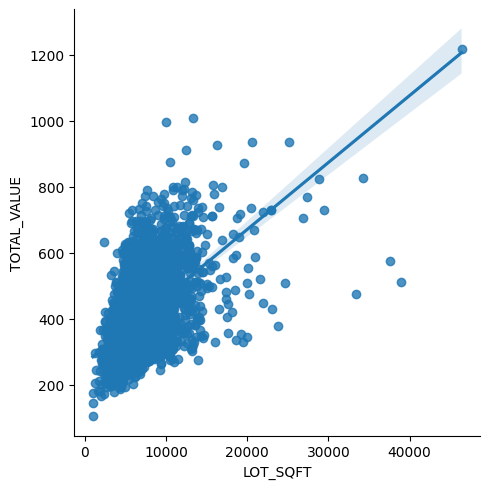

In [ ]:
# lmplot of LOT_SQFT vs TOTAL_VALUE
sns.lmplot(x = 'LOT_SQFT',
           y = 'TOTAL_VALUE',
           data = westroxbury_df)

#### As the proportion of Total lot size of parcel in square feet(LOT_SQFT) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### GROSS_AREA vs TOTAL_VALUE

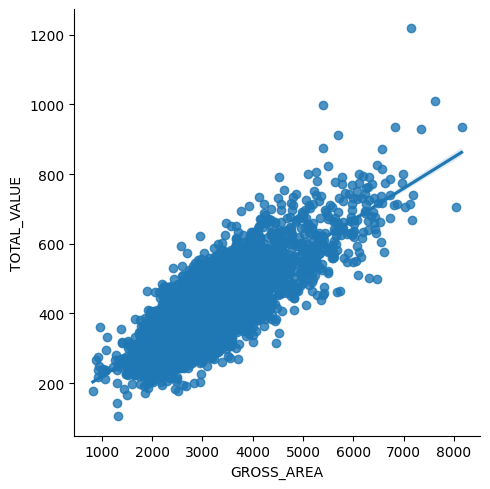

In [ ]:
# lmplot of GROSS_AREA vs TOTAL_VALUE
sns.lmplot(x = 'GROSS_AREA',
           y = 'TOTAL_VALUE',
           data = westroxbury_df)

#### As the proportion of Gross floor area(GROSS_AREA) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### LIVING_AREA vs TOTAL_VALUE

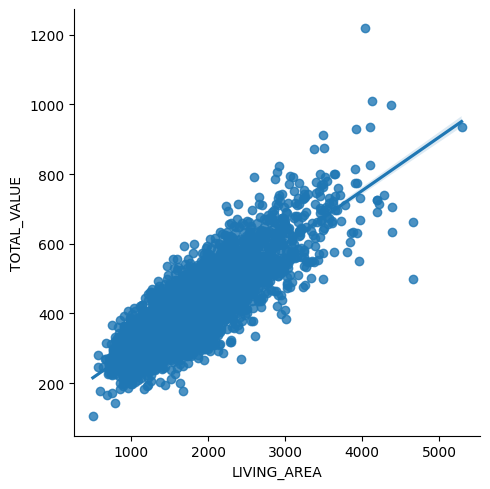

In [ ]:
# lmplot of LIVING_AREA vs TOTAL_VALUE
sns.lmplot(x = 'LIVING_AREA',
           y = 'TOTAL_VALUE',
           data = westroxbury_df)

#### As the proportion of Total living area for residential properties (ft2)(LIVING_AREA) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases¶

#### Tax vs TOTAL_VALUE

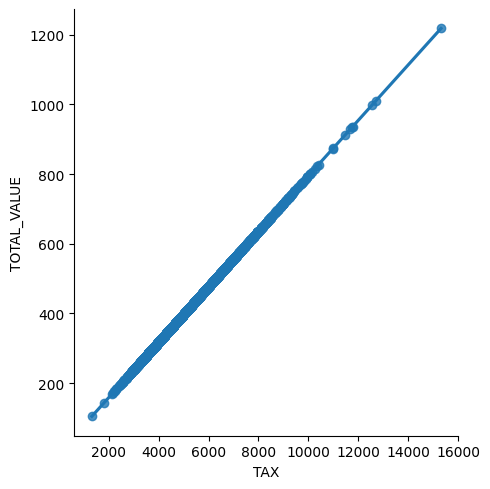

In [ ]:
# lmplot of LIVING_AREA vs TOTAL_VALUE
sns.lmplot(x = 'TAX',
           y = 'TOTAL_VALUE',
           data = westroxbury_df)

#### Building Age vs TOTAL_VALUE

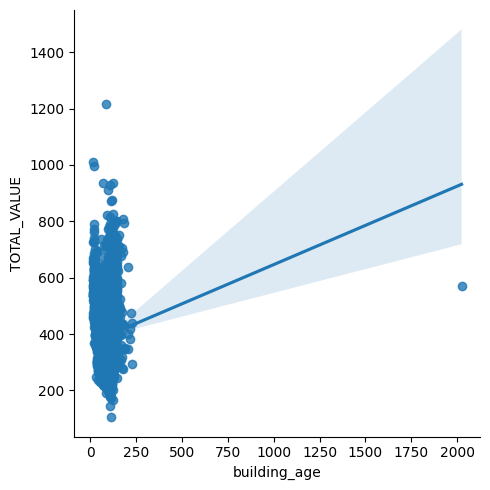

In [ ]:
# lmplot of building age vs TOTAL_VALUE
sns.lmplot(x = 'building_age',
           y = 'TOTAL_VALUE',
           data = westroxbury_df)

#### There seems to be no relationship between building age and the total assessed value of the property

#### FLOORS vs TOTAL_VALUE

<Axes: xlabel='FLOORS', ylabel='TOTAL_VALUE'>

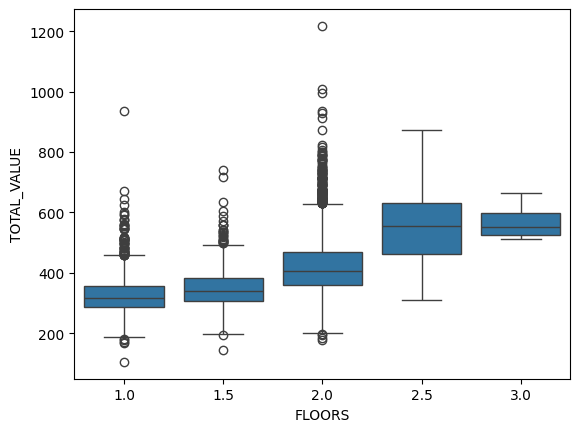

In [ ]:
# Paired boxplot of FLOORS vs TOTAL_VALUE
sns.boxplot(x = 'FLOORS',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of floors(FLOORS) Increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases and the median stops increasing after the 2.5 floors

#### ROOMS vs TOTAL_VALUE

<Axes: xlabel='ROOMS', ylabel='TOTAL_VALUE'>

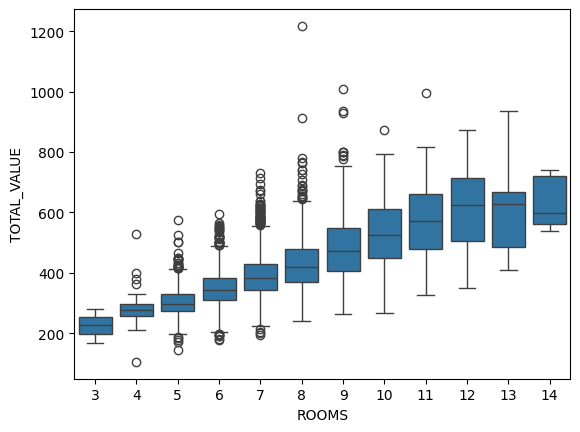

In [ ]:
# Paired boxplot of ROOMS vs TOTAL_VALUE
sns.boxplot(x = 'ROOMS',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of rooms(ROOMS) Increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases upto 12 rooms and there is slight decrease for the 13 and 14 rooms

#### BEDROOMS vs TOTAL_VALUE

<Axes: xlabel='BEDROOMS', ylabel='TOTAL_VALUE'>

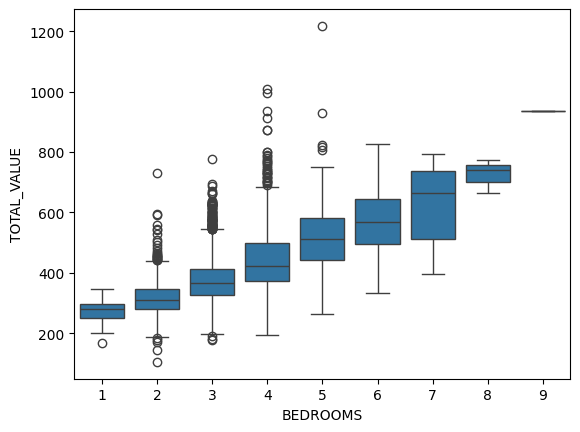

In [ ]:
# Paired boxplot of BEDROOMS vs TOTAL_VALUE
sns.boxplot(x = 'BEDROOMS',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of bedrooms(BEDROOMS) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### FULL_BATH vs TOTAL_VALUE

<Axes: xlabel='FULL_BATH', ylabel='TOTAL_VALUE'>

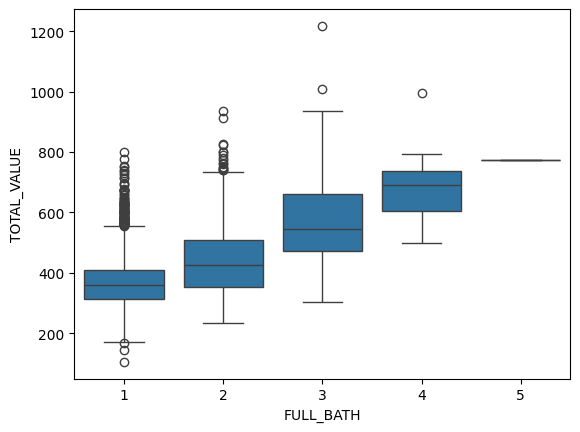

In [ ]:
# Paired boxplot of FULL_BATH vs TOTAL_VALUE
sns.boxplot(x = 'FULL_BATH',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of full bath(FULL_BATH) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### HALF_BATH vs TOTAL_VALUE

<Axes: xlabel='HALF_BATH', ylabel='TOTAL_VALUE'>

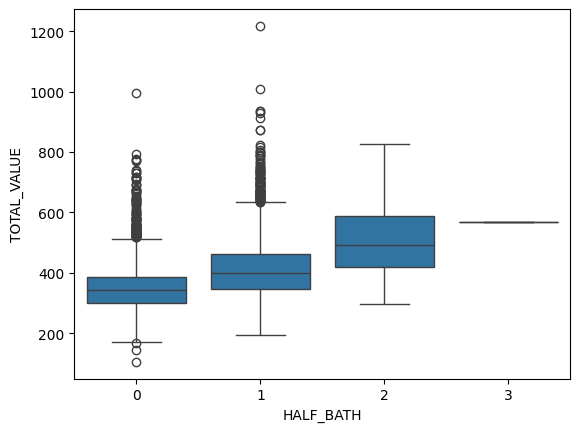

In [ ]:
# Paired boxplot of HALF_BATH vs TOTAL_VALUE
sns.boxplot(x = 'HALF_BATH',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of half bath(HALF_BATH) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### KITCHEN vs HOME_VALUE

<Axes: xlabel='KITCHEN', ylabel='TOTAL_VALUE'>

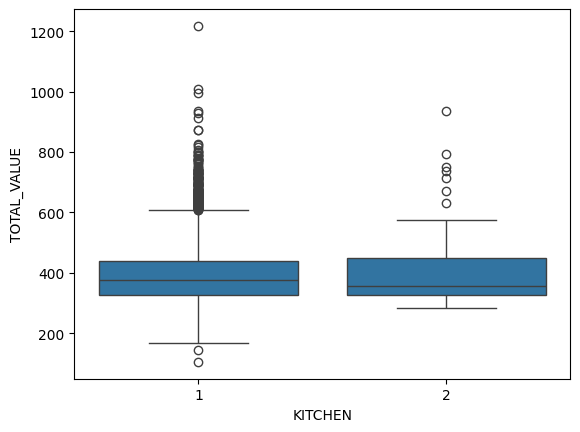

In [ ]:
# Paired boxplot of KITCHEN vs TOTAL_VALUE
sns.boxplot(x = 'KITCHEN',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The Number of kitchens(KITCHENS) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) is almost the same there is no much difference

#### REMODEL_None vs TOTAL_VALUE

<Axes: xlabel='REMODEL_None', ylabel='TOTAL_VALUE'>

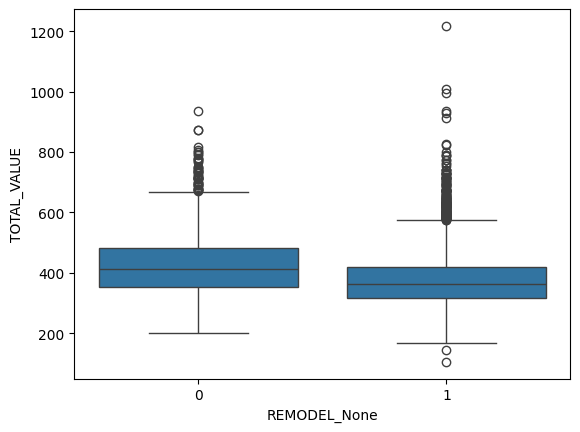

In [ ]:
# Paired boxplot of REMODEL_None vs TOTAL_VALUE
sns.boxplot(x = 'REMODEL_None',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The median of houses was not remodeled (REMODEL_None) is slightly lesser the median of houses was remodeled

#### REMODEL_Recent vs TOTAL_VALUE

<Axes: xlabel='REMODEL_Recent', ylabel='TOTAL_VALUE'>

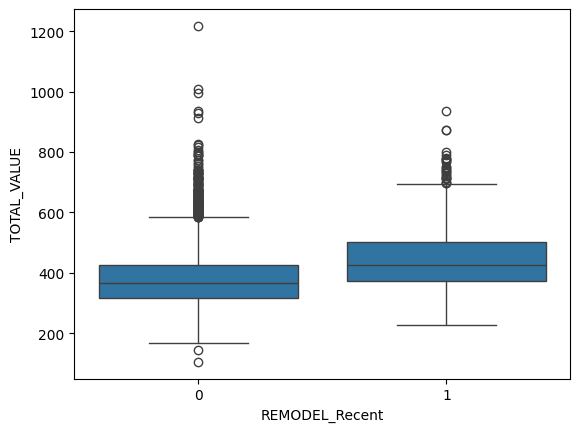

In [ ]:
# Paired boxplot of REMODEL_Recent vs TOTAL_VALUE
sns.boxplot(x = 'REMODEL_Recent',
            y = 'TOTAL_VALUE',
            data = westroxbury_df)

#### The median of houses was recently remodeled (REMODEL_Recent) is slightly higher the median of houses was not recently remodeled

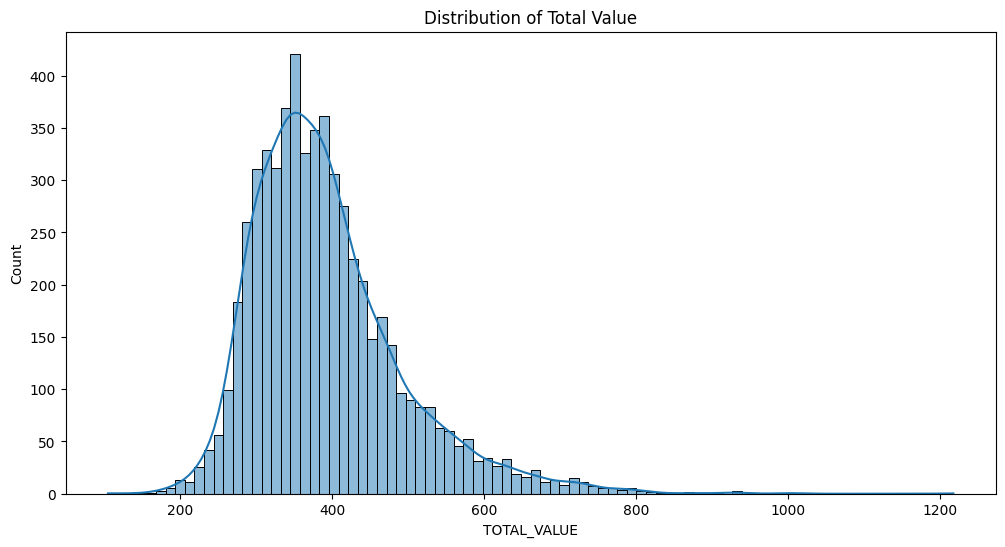

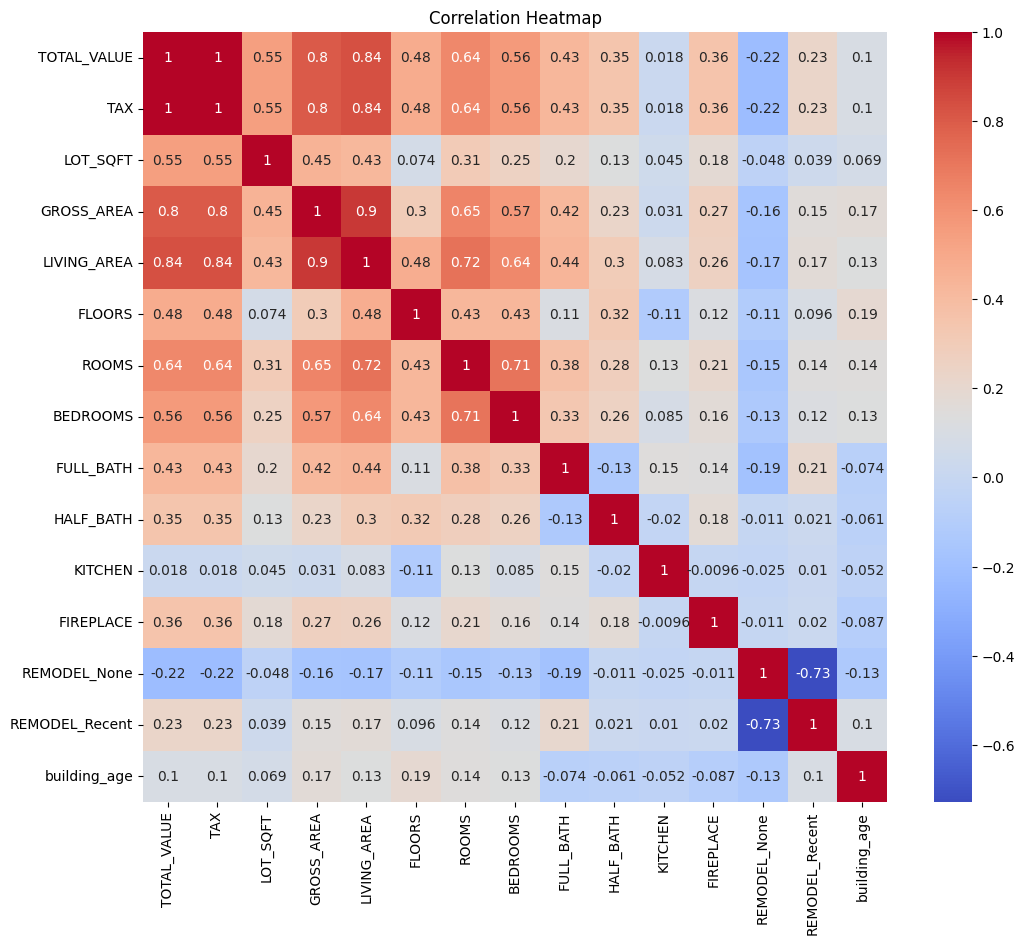

In [ ]:
# Distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(westroxbury_df['TOTAL_VALUE'], kde=True)
plt.title('Distribution of Total Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(westroxbury_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### c.	Print the correlation matrix for independent variables.

In [ ]:
## Collect numerical variables in a dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_df = westroxbury_df.select_dtypes(include=numerics)

#Remove Y variable
numerical_df.drop('TOTAL_VALUE', axis=1, inplace=True)

In [ ]:
# Check correlation among numerical independent variables using correlation matrix
cor = numerical_df.corr()
cor

,TAX,LOT_SQFT,GROSS_AREA,LIVING_AREA,building_age
TAX,1.000000,0.546120,0.800518,0.837122,0.100918
LOT_SQFT,0.546120,1.000000,0.448880,0.426045,0.068908
GROSS_AREA,0.800518,0.448880,1.000000,0.899775,0.167928
LIVING_AREA,0.837122,0.426045,0.899775,1.000000,0.131274
building_age,0.100918,0.068908,0.167928,0.131274,1.000000


<Axes: >

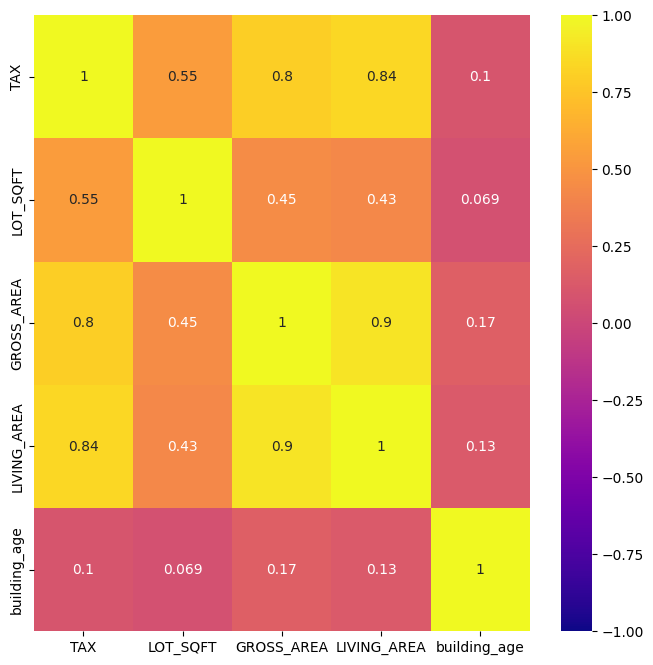

In [ ]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True)

In [ ]:
#Highly correlated X variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:10]
so

GROSS_AREA   LIVING_AREA    0.899775
LIVING_AREA  GROSS_AREA     0.899775
TAX          LIVING_AREA    0.837122
LIVING_AREA  TAX            0.837122
GROSS_AREA   TAX            0.800518
TAX          GROSS_AREA     0.800518
             LOT_SQFT       0.546120
LOT_SQFT     TAX            0.546120
GROSS_AREA   LOT_SQFT       0.448880
LOT_SQFT     GROSS_AREA     0.448880
dtype: float64

In [ ]:
# Collect independent variables as X and dependent variable as Y
# removing TAX as it shows almost perfect co-relation with total value
X  = westroxbury_df[['LOT_SQFT', 'building_age', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS',
       'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE',
       'REMODEL_None', 'REMODEL_Recent']]
y  = westroxbury_df['TOTAL_VALUE']

In [ ]:
# Creating dummies for the categorical variables and convert to int
X = pd.get_dummies(X, drop_first=True).astype(int)

In [ ]:
X.head(20)

,LOT_SQFT,building_age,GROSS_AREA,LIVING_AREA,FLOORS_1.5,FLOORS_2.0,FLOORS_2.5,FLOORS_3.0,ROOMS_4,ROOMS_5,...,HALF_BATH_1,HALF_BATH_2,HALF_BATH_3,KITCHEN_2,FIREPLACE_1,FIREPLACE_2,FIREPLACE_3,FIREPLACE_4,REMODEL_None_1,REMODEL_Recent_1
0,9965,144,2436,1352,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,6590,79,3108,1976,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,7500,134,2294,1371,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,13773,67,5032,2608,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,5000,114,2370,1438,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5142,74,2124,1060,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,5000,70,3220,1916,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,10000,74,2208,1200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,6835,66,2582,1092,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
9,5093,124,4818,2992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Add an intercept to X for our model
X  = sm.add_constant(X)

In [ ]:
X = X.astype(float)

##4.) Modelling

Creating the Linear Regression Model


In [ ]:
# Create the linear regression model based on OLS method
valuemodel = sm.OLS(y, X).fit() ## OLS(output, input)


In [ ]:
# View the model summary
valuemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_VALUE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     657.3
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:38:24   Log-Likelihood:                -29865.
No. Observations:                5802   AIC:                         5.981e+04
Df Residuals:                    5760   BIC:                         6.009e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               95.0034     24.440      3.887      0.000      47.092     142.914
LOT_SQFT             0.0086      0.000     36.638      0.000       0.008       0.009
building_age        -0.0554      0.017     -3.311      0.001      -0.088      -0.023
GROSS_AREA           0.0334      0.002     20.581      0.000       0.030       0.037
LIVING_AREA          0.0486      0.003     16.156      0.000       0.043       0.055
FLOORS_1.5          -2.7105      1.976     -1.371      0.170      -6.585       1.164
FLOORS_2.0          40.4676      1.750     23.123      0.000      37.037      43.898
FLOORS_2.5          44.2142      4.755      9.298      0.000      34.892      53.536
FLOORS_3.0          21.3836     22.278      0.960      0.337     -22.289      65.056
ROOMS_4             11.2982     24.920      0.453      0.650     -37.555      60.151
ROOMS_5              5.6252     24.799      0.227      0.821     -42.990      54.241
ROOMS_6             -0.7245     24.824     -0.029      0.977     -49.389      47.940
ROOMS_7              2.3804     24.849      0.096      0.924     -46.333      51.094
ROOMS_8              5.0294     24.886      0.202      0.840     -43.757      53.816
ROOMS_9              6.0028     24.975      0.240      0.810     -42.958      54.963
ROOMS_10             0.8774     25.127      0.035      0.972     -48.380      50.135
ROOMS_11            19.7256     25.536      0.772      0.440     -30.334      69.785
ROOMS_12            -6.9815     25.895     -0.270      0.787     -57.746      43.783
ROOMS_13            -3.8767     28.698     -0.135      0.893     -60.136      52.383
ROOMS_14            -3.3578     31.873     -0.105      0.916     -65.841      59.125
BEDROOMS_2          12.8158      8.320      1.540      0.124      -3.495      29.126
BEDROOMS_3          10.8029      8.417      1.284      0.199      -5.697      27.303
BEDROOMS_4          10.1206      8.539      1.185      0.236      -6.619      26.860
BEDROOMS_5           2.2736      8.997      0.253      0.800     -15.363      19.910
BEDROOMS_6          10.0324      9.865      1.017      0.309      -9.307      29.372
BEDROOMS_7          13.0231     14.457      0.901      0.368     -15.318      41.364
BEDROOMS_8         -16.1230     28.056     -0.575      0.566     -71.124      38.878
BEDROOMS_9          71.0378     45.540      1.560      0.119     -18.238     160.313
FULL_BATH_2         20.0956      1.528     13.151      0.000      17.100      23.091
FULL_BATH_3         54.6993      3.997     13.686      0.000      46.864      62.534
FULL_BATH_4        110.5810     12.107      9.133      0.000      86.846     134.316
FULL_BATH_5        131.0120     42.514      3.082      0.002      47.669     214.355
HALF_BATH_1         18.6293      1.307     14.249      0.000      16.066      21.192
HALF_BATH_2         40.

#### In the main table, p value of F-stat, 0.00, is well below our level of significance 0.05. So, the overall model is statistically significant and valid for estimating the population Y variable.
#### Adjusted R-Squared value of 82.4% indicates good explanatory power of the independent variables for changes in Y variable

In [ ]:
# Display the co-efficients and p values for each independent variable
reg_coeff = pd.DataFrame(valuemodel.params, columns = ['coef'])
reg_coeff['pvalue'] = valuemodel.pvalues.round(3)

#Sort the data in descending order of coefficients to identify X variables with most positive and most negative impact on Y
reg_coeff.sort_values(by='coef', ascending=False, inplace=True)

#Display only significant X variables
reg_coeff[reg_coeff['pvalue']<=0.05]

,coef,pvalue
FULL_BATH_5,131.011983,0.002
FULL_BATH_4,110.580961,0.000
const,95.003377,0.000
FULL_BATH_3,54.699296,0.000
FLOORS_2.5,44.214189,0.000
HALF_BATH_2,40.944866,0.000
FLOORS_2.0,40.467564,0.000
FIREPLACE_3,31.054566,0.001
FIREPLACE_2,30.437116,0.000
FIREPLACE_1,22.626697,0.000


#### Based on the model output, the X variable that has the maximum positive impact on the price is the number of full_bath set_5 because of high coefficient


In [ ]:
#X variables that are not significant
reg_coeff[reg_coeff['pvalue']>0.05]

,coef,pvalue
BEDROOMS_9,71.037789,0.119
HALF_BATH_3,36.737776,0.383
FLOORS_3.0,21.383554,0.337
ROOMS_11,19.725552,0.440
FIREPLACE_4,13.757595,0.518
BEDROOMS_7,13.023144,0.368
BEDROOMS_2,12.815781,0.124
ROOMS_4,11.298218,0.650
BEDROOMS_3,10.802886,0.199
BEDROOMS_4,10.120570,0.236


In [ ]:
# Predict dependent variable using the created model
predictions = valuemodel.predict(X)
predictions[1:10]

,0
1,457.807584
2,364.566396
3,549.194207
4,349.392362
5,290.395487
6,401.965124
7,314.107413
8,348.959515
9,508.853503


#### Predicted property value  for the first 10 records

In [ ]:
# Create the linear regression model based using sklearn library
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
# The R-square of the model
lm.score(X,y)

0.8239060689336053

####  R-Squared value of 81% indicates good explanatory power of the independent variables for changes in Y variable

In [ ]:
# Coefficients of the created model
lm.coef_

array([ 8.07351379e-12,  8.62994495e-03, -5.53550046e-02,  3.33543380e-02,
        4.86448027e-02, -2.71046895e+00,  4.04675645e+01,  4.42141894e+01,
        2.13835536e+01,  1.12982180e+01,  5.62520517e+00, -7.24483408e-01,
        2.38037224e+00,  5.02935145e+00,  6.00280613e+00,  8.77371893e-01,
        1.97255524e+01, -6.98148732e+00, -3.87667478e+00, -3.35780470e+00,
        1.28157814e+01,  1.08028856e+01,  1.01205704e+01,  2.27356569e+00,
        1.00324168e+01,  1.30231443e+01, -1.61229578e+01,  7.10377893e+01,
        2.00955874e+01,  5.46992961e+01,  1.10580961e+02,  1.31011983e+02,
        1.86293266e+01,  4.09448660e+01,  3.67377756e+01, -1.55803991e+01,
        2.26266969e+01,  3.04371164e+01,  3.10545657e+01,  1.37575950e+01,
       -5.19768634e+00,  2.03280815e+01])

In [ ]:
# Intercept for the created model
lm.intercept_

95.00337678560606

#### The Y-intercept or constant value is 94.78

In [ ]:
### Predict the dependent variable, value of the property, using the model

# Predict dependent variable using the created model
predictions = lm.predict(X)
print(predictions[0:5]) # First five housing prices

[384.02620511 457.80758357 364.56639576 549.19420659 349.39236176]


#### Predicted property value for the first 5 records

In [ ]:
# Import the Sklearn Model Performance Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculate MAE value for model evaluation
mae = mean_absolute_error(y,predictions)
print(np.round(mae,3))

31.292


In [ ]:
# Calculate RMSE
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
print(np.round(mse,3))
print(np.round(rmse,3))

1731.789
41.615


In [ ]:
# Calculate MAPE
actual  = y
abs_error = np.abs(actual - predictions)
mape = np.round(np.mean(abs_error/actual),4)*100
mape

8.129999999999999

#### MAE is 31.292, RMSE is 41.615.
#### MAPE value of 8.12 indicates good prediction accuracy of the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train);


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    return train_mse, test_mse, train_r2, test_r2

# Evaluate each model
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)
rf_results = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)
svr_results = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Print results
print("Linear Regression - Train R2: {:.3f}, Test R2: {:.3f}".format(lr_results[2], lr_results[3]))
print("Random Forest - Train R2: {:.3f}, Test R2: {:.3f}".format(rf_results[2], rf_results[3]))
print("SVR - Train R2: {:.3f}, Test R2: {:.3f}".format(svr_results[2], svr_results[3]))

Linear Regression - Train R2: 0.826, Test R2: 0.812
Random Forest - Train R2: 0.974, Test R2: 0.819
SVR - Train R2: 0.566, Test R2: 0.549


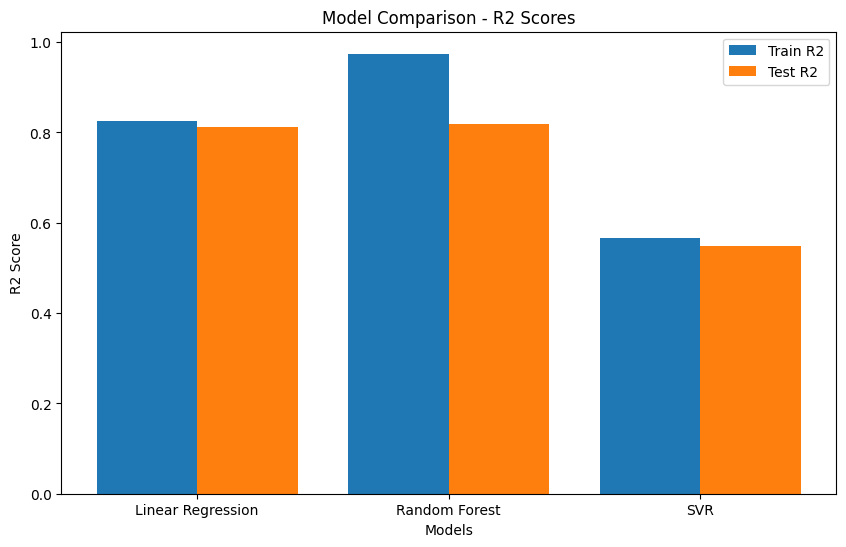

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'SVR']
train_r2 = [lr_results[2], rf_results[2], svr_results[2]]
test_r2 = [lr_results[3], rf_results[3], svr_results[3]]

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar([i - 0.2 for i in x], train_r2, width=0.4, label='Train R2', align='center')
plt.bar([i + 0.2 for i in x], test_r2, width=0.4, label='Test R2', align='center')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Scores')
plt.xticks(x, models)
plt.legend()
plt.show()

#### Performing PCA and running different models to check performance

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"Number of components after PCA: {X_pca.shape[1]}")

Number of components after PCA: 2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train);

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    return train_mse, test_mse, train_r2, test_r2

# Evaluate each model
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)
rf_results = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)
svr_results = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Print results
print("Linear Regression - Train R2: {:.3f}, Test R2: {:.3f}".format(lr_results[2], lr_results[3]))
print("Random Forest - Train R2: {:.3f}, Test R2: {:.3f}".format(rf_results[2], rf_results[3]))
print("SVR - Train R2: {:.3f}, Test R2: {:.3f}".format(svr_results[2], svr_results[3]))

Linear Regression - Train R2: 0.725, Test R2: 0.703
Random Forest - Train R2: 0.955, Test R2: 0.664
SVR - Train R2: 0.595, Test R2: 0.575


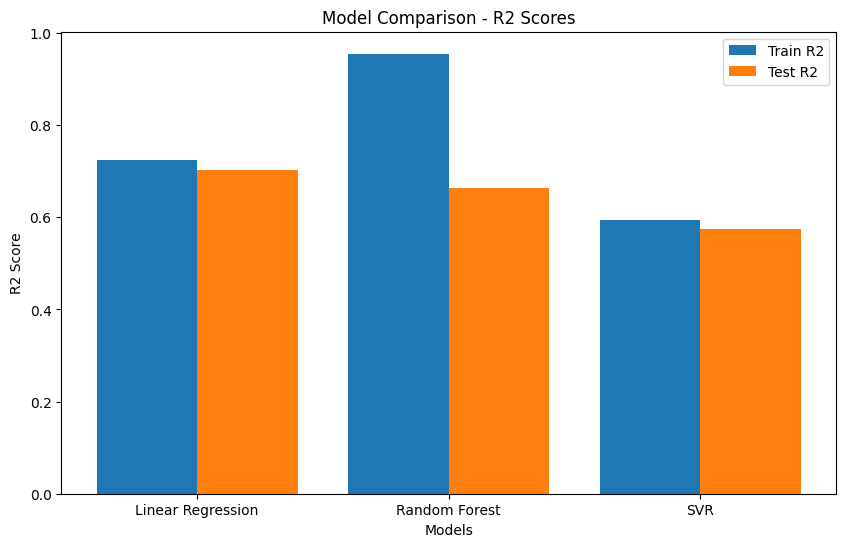

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'SVR']
train_r2 = [lr_results[2], rf_results[2], svr_results[2]]
test_r2 = [lr_results[3], rf_results[3], svr_results[3]]

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar([i - 0.2 for i in x], train_r2, width=0.4, label='Train R2', align='center')
plt.bar([i + 0.2 for i in x], test_r2, width=0.4, label='Test R2', align='center')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Scores')
plt.xticks(x, models)
plt.legend()
plt.show()

Based on the results provided, we can analyze the performance of the three models (Linear Regression, Random Forest, and Support Vector Regression) both with and without Principal Component Analysis (PCA). Here's an interpretation of the results:

## Without PCA

1. Linear Regression:
   - Train R2: 0.826
   - Test R2: 0.812
   - The model performs well and shows good generalization, with only a small difference between train and test scores.

2. Random Forest:
   - Train R2: 0.974
   - Test R2: 0.819
   - Excellent performance on training data, but the large gap between train and test scores suggests overfitting.

3. Support Vector Regression (SVR):
   - Train R2: 0.566
   - Test R2: 0.549
   - Consistent performance between train and test sets, but overall lower accuracy compared to the other models.

## With PCA

1. Linear Regression:
   - Train R2: 0.725
   - Test R2: 0.703
   - Performance decreased compared to without PCA, but still shows good generalization.

2. Random Forest:
   - Train R2: 0.955
   - Test R2: 0.664
   - Still shows signs of overfitting, and test performance decreased significantly with PCA.

3. Support Vector Regression (SVR):
   - Train R2: 0.595
   - Test R2: 0.575
   - Slight improvement in both train and test scores compared to without PCA.

## Model Comparison and Selection

1. Best performing model: Random Forest without PCA
   - Highest test R2 score (0.819)
   - However, it shows signs of overfitting

2. Most consistent model: Linear Regression without PCA
   - Good balance between performance (test R2: 0.812) and generalization

3. Impact of PCA:
   - Decreased performance for Linear Regression and Random Forest
   - Slightly improved performance for SVR
   - Generally reduced overfitting in Random Forest, but at the cost of accuracy

## Recommendation

For this dataset, the Linear Regression model without PCA appears to be the best choice for deployment in a real-life scenario. It offers high accuracy (test R2: 0.812) and good generalization, without the overfitting issues seen in the Random Forest model.

## Advantages of Linear Regression model

1. Good performance (R2: 0.812)
2. Consistent results between training and test sets
3. Interpretability of coefficients
4. Computationally efficient

## Disadvantages of Linear Regression model

1. Assumes linear relationships between features and target
2. May not capture complex, non-linear patterns in the data
3. Sensitive to outliers

In conclusion, while the Random Forest model showed the highest test R2 score, the Linear Regression model provides a better balance of performance, generalization, and interpretability for this particular dataset.
